# Inverse Simulation of Newton's Law of Cooling
We will use the Newton's Law of Cooling to simulate the temperature of a body that is cooling down. The Newton's Law of Cooling is given by the following differential equation:
$$
\frac{dT}{dt} = -k(T - T_a)
$$
where:
- $T$ is the temperature of the body at time $t$,
- $T_a$ is the ambient temperature,
- $k$ is the cooling constant,
- $\frac{dT}{dt}$ is the rate of change of temperature with respect to time.
The solution to this differential equation is given by:
$$
T(t) = T_a + (T_0 - T_a)e^{-kt}
$$
We will try to estimate the cooling constant $k$ in this notebook.

## Experimental Setup
We will simulate the cooling of a beaker of hot water $T_0 = 100^\circ C$. The temperature of the hot water is measured at regular intervals of time. The ambient temperature is $T_a = 20^\circ C$.

```{figure} Setup.png
---
name: Setup
width: 500px
---
Experimental Setup
```

# 0. Import necessary libraries
We will need libraries like `numpy` to perform and `matplotlib` to plot the simulation results. The `pandas` library will be used to read the experimental data.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Define the parameters
We will define the parameters of the simulation such as the initial temperature $T_0$, the ambient temperature $T_a$, the cooling constant $k$, and the time step $\Delta t$. We will also define the time interval over which we want to simulate the cooling.

In [2]:
# Define the parameters
T0 = 70.0  # Initial temperature in degree Celsius
Ta = 20.0   # Ambient temperature in degree Celsius
k = 0.005     # Cooling constant - assumed a value for simulation
dt = 1      # Time step in seconds
time = np.arange(0, 3600, dt)  # Time interval for simulation - 1 hour (3600 seconds)

## 2. Simulate the cooling process
We will simulate the cooling process using the formula:
$$
T(t) = T_a + (T_0 - T_a)e^{-kt}
$$

In [3]:
# Simulate the cooling process
T = Ta + (T0 - Ta) * np.exp(-k * time)

## 3. Plot the results
We will plot the temperature of the hot water as a function of time to visualize the cooling process.

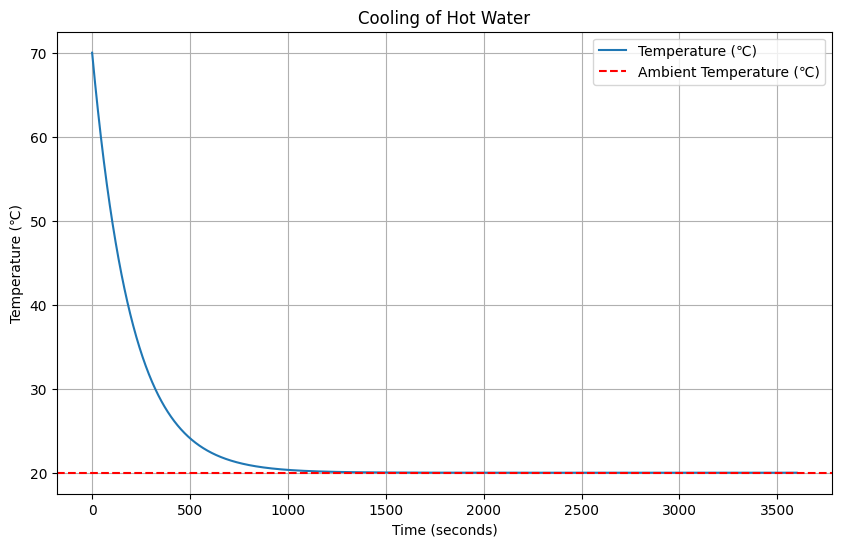

In [4]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, T, label='Temperature (℃)')
plt.axhline(y=Ta, color='r', linestyle='--', label='Ambient Temperature (℃)')
plt.title("Cooling of Hot Water")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (℃)")
plt.legend()
plt.grid(True)
plt.show()

Here, we can see that the temperature of the hot water decreases exponentially with time and approaches the ambient temperature $T_a = 20^\circ C$. The cooling constant $k$ determines how quickly the temperature decreases. A higher value of $k$ results in faster cooling, while a lower value of $k$ results in slower cooling.
What do you think would happen if we change the cooling constant $k$? Try changing the value of $k$ and see how it affects the cooling process.
What does the cooling constant $k$ represent in the context of Newton's Law of Cooling?
$k$ depends on the thermal properties of the body and the surrounding environment. It represents the rate at which the body loses heat to the environment.

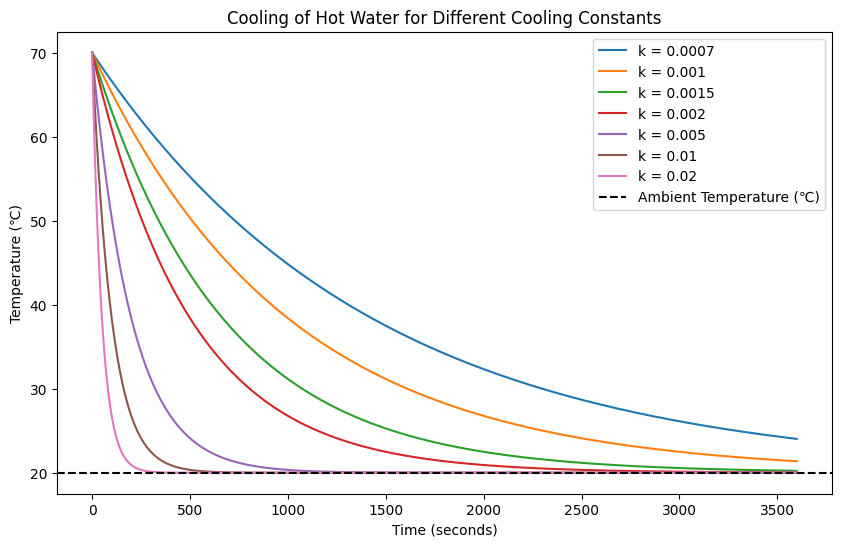

In [5]:
# Range of cooling constants to simulate different scenarios
k_values = [0.0007, 0.001, 0.0015, 0.002, 0.005, 0.01, 0.02]
T_values = []
for k in k_values:
    T = Ta + (T0 - Ta) * np.exp(-k * time)
    T_values.append(T)

# Let's plot the results for different values of k
plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values):
    plt.plot(time, T_values[i], label=f'k = {k}')
plt.axhline(y=Ta, color='k', linestyle='--', label='Ambient Temperature (℃)')
plt.title("Cooling of Hot Water for Different Cooling Constants")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (℃)")
plt.legend()
plt.show()

## 4. Read in experimental data
Let's import some experimental data of the temperature of the hot water at different time intervals. We will then try to estimate the cooling constant $k$ by fitting the data to the Newton's Law of Cooling equation. To do this we will use the `pandas` library to read the data from a CSV file. Btw the data was acquired using a thermocouple and collected using a python script based on the `nidaqmx` library.


In [6]:
# Import experimental data
data = pd.read_csv('thermocouple_data.csv', encoding='unicode_escape')
data.head()
# remove data above 70
data = data[data['Thermocouple Reading (°C)'] < 70]
# adjust the timestamp
data['Timestamp'] = data['Timestamp'] - data['Timestamp'].iloc[0]

## 5. Plot the data
Let's plot the experimental data to visualize the temperature of the hot water as a function of time.

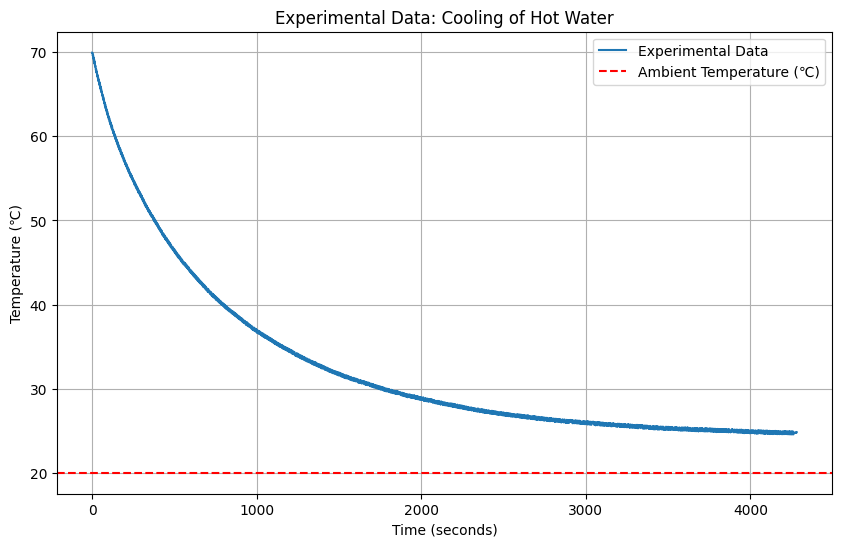

In [7]:
# Plot the experimental data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Thermocouple Reading (°C)'], '-', label='Experimental Data')
plt.axhline(y=Ta, color='r', linestyle='--', label='Ambient Temperature (℃)')
plt.title("Experimental Data: Cooling of Hot Water")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (℃)")
plt.legend()
plt.grid(True)
plt.show()

## 6. Overlap the simulation with the experimental data
Let's overlap the simulation results with the experimental data to estimate the cooling constant $k$.

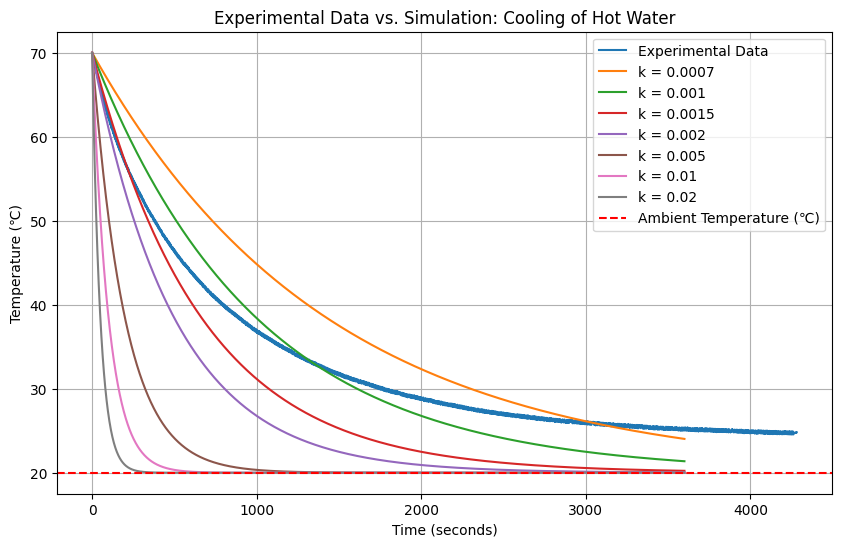

In [8]:
# Plot the experimental data and simulation results
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Thermocouple Reading (°C)'], '-', label='Experimental Data')
for i, k in enumerate(k_values):
    plt.plot(time, T_values[i], label=f'k = {k}')
plt.axhline(y=Ta, color='r', linestyle='--', label='Ambient Temperature (℃)')
plt.title("Experimental Data vs. Simulation: Cooling of Hot Water")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (℃)")
plt.legend()
plt.grid(True)
plt.show()

## 7. Estimate the cooling constant k
We will estimate the cooling constant $k$ by fitting the experimental data to the Newton's Law of Cooling equation.
We will use the `numpy` library to find the best fit value of $k$.

94.525865


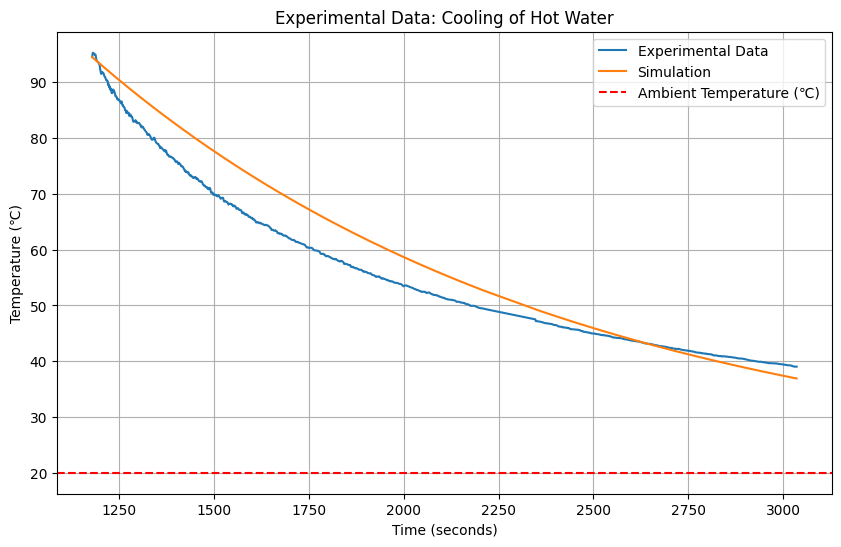

In [9]:
# open the experimental data
data = pd.read_csv('labview_data.csv', encoding='unicode_escape')
data.head()
# rename the columns
data.columns = ['Timestamp', 'Temperature']
k = 0.0008
T0 = data['Temperature'].iloc[0]
print(T0)
T_sim = Ta + (T0 - Ta) * np.exp(-k * (data['Timestamp']-data['Timestamp'].iloc[0]))

# plot the experimental data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Temperature'], '-', label='Experimental Data')
plt.plot(data['Timestamp'], T_sim, '-', label='Simulation')
plt.axhline(y=Ta, color='r', linestyle='--', label='Ambient Temperature (℃)')
plt.title("Experimental Data: Cooling of Hot Water")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (℃)")
plt.legend()
plt.grid(True)
plt.show()
